# Matrix Factorization Visualizations - Method 3 (Off-the-shelf Implementation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, KFold, GridSearchCV

In [2]:
# Use SurpriseSVD

# load data
train = np.loadtxt('./data/train2.txt').astype(int)
test = np.loadtxt('./data/test2.txt').astype(int)
train = pd.DataFrame(train)
train.columns=['User', 'Movie', 'Rating']
test = pd.DataFrame(test)
test.columns=['User', 'Movie', 'Rating']

reader = Reader(rating_scale=(1, 5))
train_data = Dataset.load_from_df(train[['User', 'Movie', 'Rating']], reader)
train_data = train_data.build_full_trainset()

In [3]:
# Train SVD with no grid search
algo = SVD()
algo.fit(train_data)

In [4]:
# Get the U and V matrix to correct dimensions
U = algo.pu.T
V = algo.qi.T

In [5]:
# mean-centering 
V_mean = V.mean(axis=1)
for i in range(len(V[0])):
    V[:,i] -= V_mean
for i in range(len(U[0])):
    U[:,i] -= V_mean

# get SVD of V
A, S, B = np.linalg.svd(V)

In [6]:
# project U, V into K-dimensional space
K = 2
U_tilde = np.matmul(A.T[:K], U)
V_tilde = np.matmul(A.T[:K], V)

In [7]:
# load data from cleaned files
movies = pd.read_csv('data/movies.csv')
data = pd.read_csv('data/data.csv')

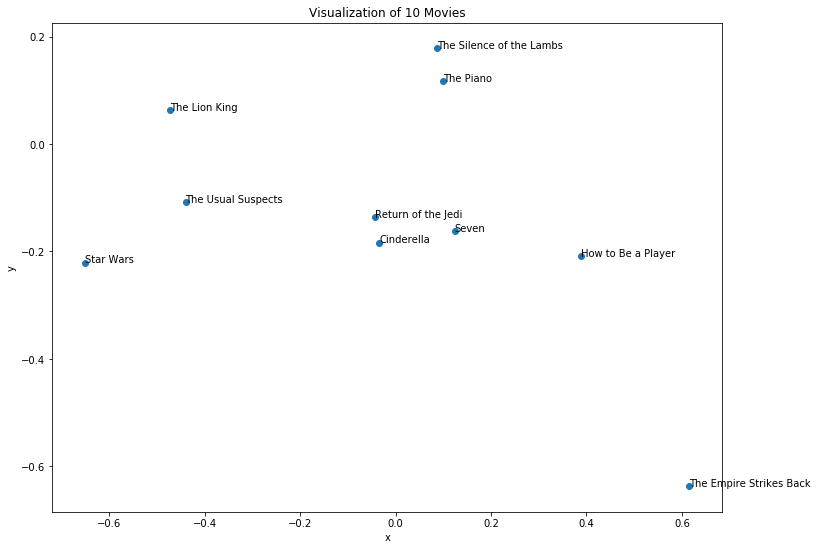

In [8]:
# visualize any 10 movies
ids = [11, 12, 71, 415, 98, 333, 578, 181, 172, 50]

titles = ['Seven', 'The Usual Suspects', 'The Lion King', 'Cinderella', 'The Silence of the Lambs', 'How to Be a Player', 'The Piano', 'Return of the Jedi', 'The Empire Strikes Back', 'Star Wars']   
    
x = [0]*10
y = [0]*10
for i in range(len(ids)):
    x[i] = V_tilde[0][ids[i]-1]
    y[i] = V_tilde[1][ids[i]-1]

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('Visualization of 10 Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_a.png')

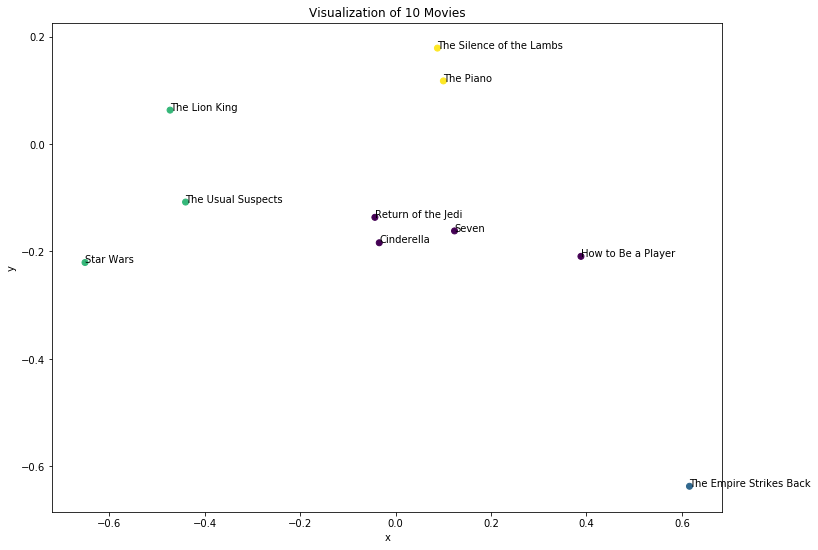

In [9]:
# run k-means to cluster points
from sklearn.cluster import KMeans

X = np.column_stack((x, y))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y, c=labels)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('Visualization of 10 Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_a_clusters.png')

49    Star Wars (1977)
Name: Title, dtype: object
257    Contact (1997)
Name: Title, dtype: object
99    Fargo (1996)
Name: Title, dtype: object
180    Return of the Jedi (1983)
Name: Title, dtype: object
292    Liar Liar (1997)
Name: Title, dtype: object
284    English Patient, The (1996)
Name: Title, dtype: object
286    Scream (1996)
Name: Title, dtype: object
0    Toy Story (1995)
Name: Title, dtype: object
298    Air Force One (1997)
Name: Title, dtype: object
120    Independence Day (ID4) (1996)
Name: Title, dtype: object


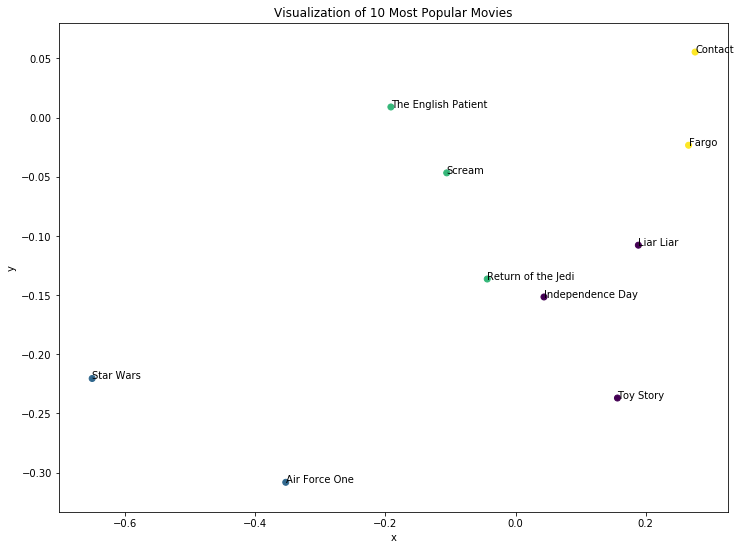

In [10]:
# visualize 10 most popular movies
pop = data['Movie'].value_counts().head(10).index

for i in pop:
    print(movies[movies['ID'] == i]['Title'])
    
titles = ['Star Wars', 'Contact', 'Fargo', 'Return of the Jedi', 'Liar Liar', 'The English Patient', 'Scream', 'Toy Story', 'Air Force One', 'Independence Day']   
    
x = [0]*10
y = [0]*10
for i in range(len(pop)):
    x[i] = V_tilde[0][pop[i]-1]
    y[i] = V_tilde[1][pop[i]-1]

# clustering
X = np.column_stack((x, y))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y, c=labels)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))

plt.title('Visualization of 10 Most Popular Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_b_clusters.png')

1588    Someone Else's America (1995)
Name: Title, dtype: object
1179    Prefontaine (1997)
Name: Title, dtype: object
1525    Aiqing wansui (1994)
Name: Title, dtype: object
1282    Star Kid (1997)
Name: Title, dtype: object
1637    Entertaining Angels: The Dorothy Day Story (1996)
Name: Title, dtype: object
1112    They Made Me a Criminal (1939)
Name: Title, dtype: object
1191    Marlene Dietrich: Shadow and Light (1996) 
Name: Title, dtype: object
807    Great Day in Harlem, A (1994)
Name: Title, dtype: object
1456    Saint of Fort Washington, The (1993)
Name: Title, dtype: object
1489    Santa with Muscles (1996)
Name: Title, dtype: object


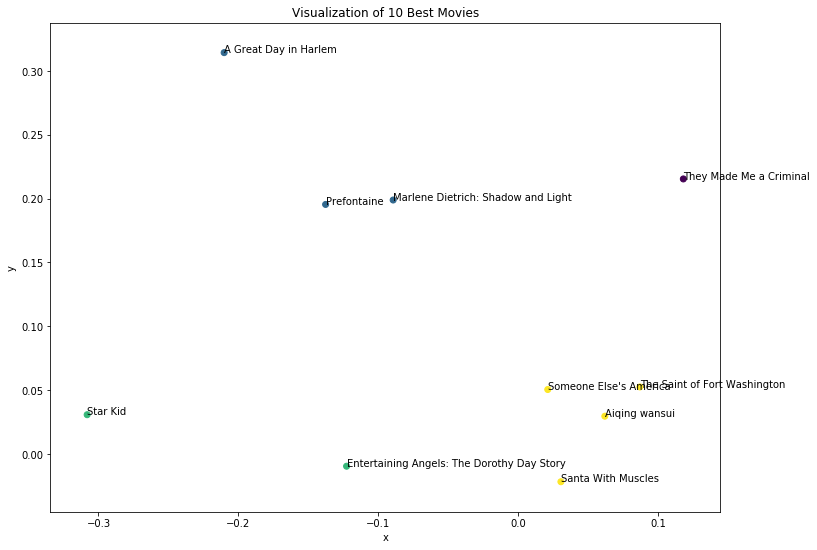

In [11]:
# visualize 10 best movies
sorted_df = movies.sort_values(by='avg_rating', ascending=False)
best = sorted_df.head(10)['ID']

for i in best:
    print(movies[movies['ID'] == i]['Title'])
    
titles = ["Someone Else's America", 'Prefontaine', 'Aiqing wansui', 'Star Kid', 'Entertaining Angels: The Dorothy Day Story', 'They Made Me a Criminal', 'Marlene Dietrich: Shadow and Light', 'A Great Day in Harlem', 'The Saint of Fort Washington', 'Santa With Muscles']   
    
x = [0]*10
y = [0]*10
count = 0
for i in best:
    x[count] = V_tilde[0][i-1]
    y[count] = V_tilde[1][i-1]
    count += 1

# clustering
X = np.column_stack((x, y))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y, c=labels)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('Visualization of 10 Best Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_c_clusters.png')

0    Toy Story (1995)
Name: Title, dtype: object
70    Lion King, The (1994)
Name: Title, dtype: object
94    Aladdin (1992)
Name: Title, dtype: object
98    Snow White and the Seven Dwarfs (1937)
Name: Title, dtype: object
100    Heavy Metal (1981)
Name: Title, dtype: object
101    Aristocats, The (1970)
Name: Title, dtype: object
102    All Dogs Go to Heaven 2 (1996)
Name: Title, dtype: object
113    Wallace & Gromit: The Best of Aardman Animatio...
Name: Title, dtype: object
168    Wrong Trousers, The (1993)
Name: Title, dtype: object
188    Grand Day Out, A (1992)
Name: Title, dtype: object


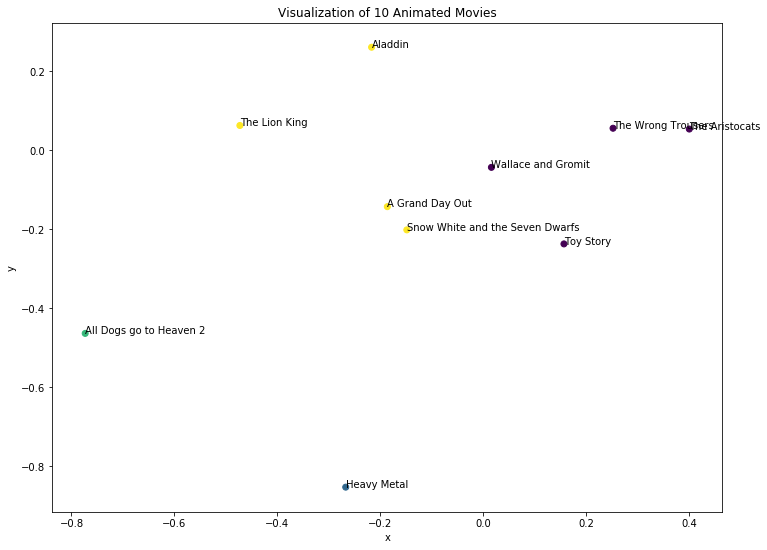

In [12]:
# Visualize 10 animated movies
# get all animated movies 
animated = movies[movies['Animation'] == 1]['ID'].head(10)

for i in animated:
    print(movies[movies['ID'] == i]['Title'])
    
titles = ['Toy Story', 'The Lion King', 'Aladdin', 'Snow White and the Seven Dwarfs', 'Heavy Metal', 'The Aristocats', 'All Dogs go to Heaven 2', 'Wallace and Gromit', 'The Wrong Trousers', 'A Grand Day Out']   
    
x = [0]*10
y = [0]*10
count = 0

for i in animated:
    x[count] = V_tilde[0][i-1]
    y[count] = V_tilde[1][i-1]
    count += 1
    
# clustering
X = np.column_stack((x, y))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y, c=labels)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('Visualization of 10 Animated Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_d_1_clusters.png')

50    Legends of the Fall (1994)
Name: Title, dtype: object
72    Maverick (1994)
Name: Title, dtype: object
96    Dances with Wolves (1990)
Name: Title, dtype: object
176    Good, The Bad and The Ugly, The (1966)
Name: Title, dtype: object
202    Unforgiven (1992)
Name: Title, dtype: object
231    Young Guns (1988)
Name: Title, dtype: object
411    Apple Dumpling Gang, The (1975)
Name: Title, dtype: object
431    Butch Cassidy and the Sundance Kid (1969)
Name: Title, dtype: object
466    Tombstone (1993)
Name: Title, dtype: object
505    Magnificent Seven, The (1954)
Name: Title, dtype: object


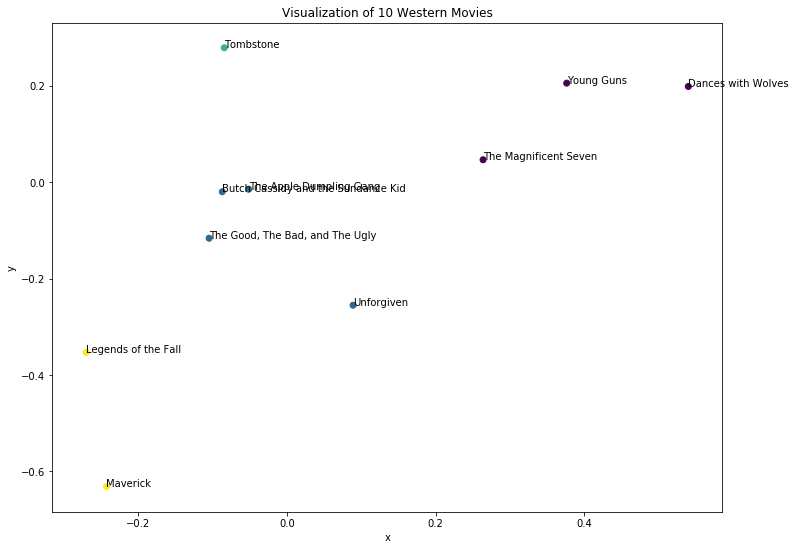

In [13]:
# Visualize 10 Western movies
# get all Western movies 
western = movies[movies['Western'] == 1]['ID'].head(10)

for i in western:
    print(movies[movies['ID'] == i]['Title'])
    
titles = ['Legends of the Fall', 'Maverick', 'Dances with Wolves', 'The Good, The Bad, and The Ugly', 'Unforgiven', 'Young Guns', 'The Apple Dumpling Gang', 'Butch Cassidy and the Sundance Kid', 'Tombstone', 'The Magnificent Seven']   
    
x = [0]*10
y = [0]*10
count = 0

for i in western:
    x[count] = V_tilde[0][i-1]
    y[count] = V_tilde[1][i-1]
    count += 1

# clustering
X = np.column_stack((x, y))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y, c=labels)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('Visualization of 10 Western Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_d_2_clusters.png')

16    From Dusk Till Dawn (1996)
Name: Title, dtype: object
83    Robert A. Heinlein's The Puppet Masters (1994)
Name: Title, dtype: object
100    Heavy Metal (1981)
Name: Title, dtype: object
122    Frighteners, The (1996)
Name: Title, dtype: object
182    Alien (1979)
Name: Title, dtype: object
183    Army of Darkness (1993)
Name: Title, dtype: object
184    Psycho (1960)
Name: Title, dtype: object
199    Shining, The (1980)
Name: Title, dtype: object
200    Evil Dead II (1987)
Name: Title, dtype: object
207    Young Frankenstein (1974)
Name: Title, dtype: object


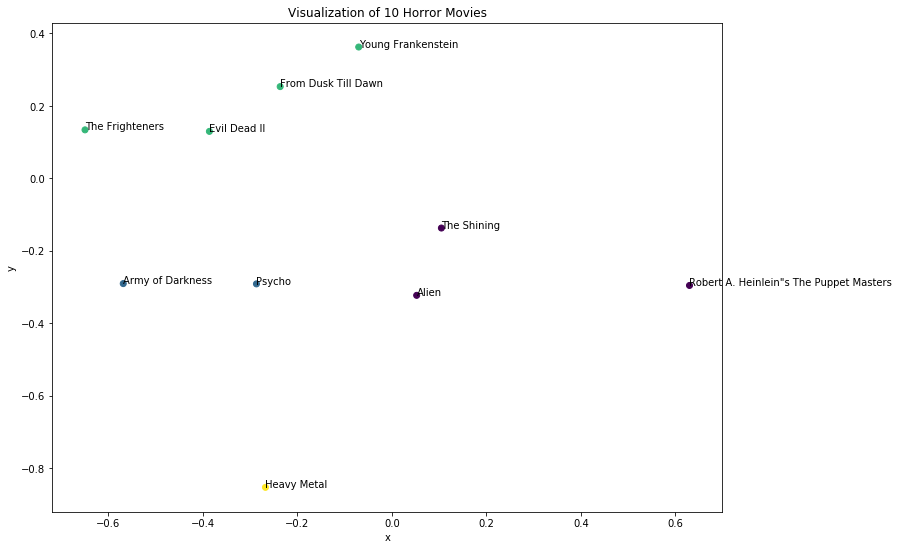

In [14]:
# Visualize 10 horror movies
horror = movies[movies['Horror'] == 1]['ID'].head(10)

for i in horror:
    print(movies[movies['ID'] == i]['Title'])
    
titles = ['From Dusk Till Dawn', 'Robert A. Heinlein"s The Puppet Masters', 'Heavy Metal', 'The Frighteners', 'Alien', 'Army of Darkness', 'Psycho', 'The Shining', 'Evil Dead II', 'Young Frankenstein']   
    
x = [0]*10
y = [0]*10
count = 0

for i in horror:
    x[count] = V_tilde[0][i-1]
    y[count] = V_tilde[1][i-1]
    count += 1
    
# clustering
X = np.column_stack((x, y))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)

fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(x, y, c=labels)

for i, txt in enumerate(titles):
    ax.annotate(txt, (x[i], y[i]))
    
plt.title('Visualization of 10 Horror Movies')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('matrix_3_d_3_clusters.png')